In [279]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


In [280]:
#Import required libraries
import pandas as pd
import seaborn as sns
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [281]:
train=pd.read_csv('/content/train.csv')

In [282]:
train.head()

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated


In [283]:
train.shape

(256442, 6)

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256442 entries, 0 to 256441
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         256442 non-null  int64 
 1   tid1       256442 non-null  int64 
 2   tid2       256442 non-null  int64 
 3   title1_en  256442 non-null  object
 4   title2_en  256442 non-null  object
 5   label      256442 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.7+ MB


In [285]:
train.isna().sum()

id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64

In [286]:
print(train.groupby('label').size())

label
agreed        74238
disagreed      6606
unrelated    175598
dtype: int64


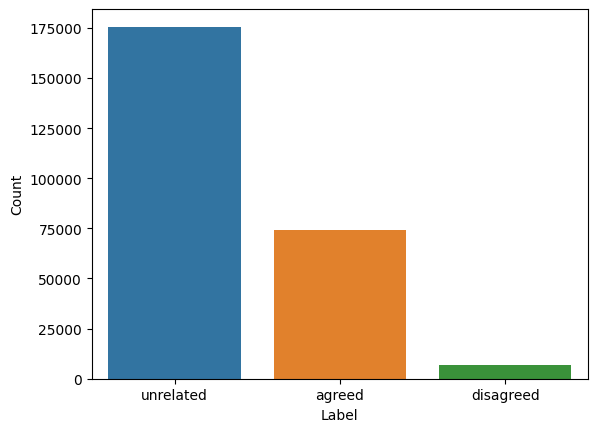

In [287]:
sns.countplot(x="label",data=train)
plt.ylabel("Count")
plt.xlabel("Label")
plt.show()

In [288]:
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

There are two new old-age insurance benefits for old people in rural areas. Have you got them?
Police disprove "bird's nest congress each person gets 50,000 yuan" still old people insist on going to beijing


In [289]:
#Convert Lowercase
train["title1_en"] = train["title1_en"].str.lower()
train["title2_en"] = train["title2_en"].str.lower()
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

there are two new old-age insurance benefits for old people in rural areas. have you got them?
police disprove "bird's nest congress each person gets 50,000 yuan" still old people insist on going to beijing


In [290]:
#Remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train["title1_en"] = train["title1_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
train["title2_en"] = train["title2_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new old-age insurance benefits old people rural areas. got them?
police disprove "bird's nest congress person gets 50,000 yuan" still old people insist going beijing


In [291]:
#Strip whitespace
train["title1_en"] = train["title1_en"].str.strip()
train["title2_en"] = train["title2_en"].str.strip()
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new old-age insurance benefits old people rural areas. got them?
police disprove "bird's nest congress person gets 50,000 yuan" still old people insist going beijing


In [292]:
#Remove punctuation
import string
string.punctuation
train["title1_en"] = train["title1_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
train["title2_en"] = train["title2_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new oldage insurance benefits old people rural areas got them
police disprove birds nest congress person gets 50000 yuan still old people insist going beijing


In [293]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
train["title1_en"] = train["title1_en"].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in str(x).split()]))
train["title2_en"] = train["title2_en"].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in str(x).split()]))
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new oldage insurance benefit old people rural area got them
police disprove bird nest congress person get 50000 yuan still old people insist going beijing


In [294]:
#Create dataframe with required feature columns
# train = train [['title1_en', 'title2_en', 'label']]
X = train['title1_en'] + '' + train['title2_en']
y = train['label']
# train.shape

In [295]:
X[0]

'two new oldage insurance benefit old people rural area got thempolice disprove bird nest congress person get 50000 yuan still old people insist going beijing'

In [296]:
X.head(5)

0    two new oldage insurance benefit old people ru...
1    if come shenzhen sooner later son also come le...
2    if come shenzhen sooner later son also come le...
3    if come shenzhen sooner later son also come le...
4    if come shenzhen sooner later son also come le...
dtype: object

In [297]:
from scipy.sparse import coo_matrix, vstack, hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [298]:
vectorizer =TfidfVectorizer(stop_words= 'english')

In [299]:
# title1 = vectorizer.fit(train['title1_en'])
# title1_tfidf = title1.transform(train['title1_en'])




In [300]:
# title2 = vectorizer.fit(train['title2_en'])
# title2_tfidf = title2.transform(train['title2_en'])

In [301]:
# title_stack = hstack([title1_tfidf, title2_tfidf])

In [302]:
print(title1_tfidf.shape)
print(title2_tfidf.shape)
print(title_stack.shape)

(256442, 28629)
(256442, 40496)
(256442, 69125)


In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, random_state=20)

In [304]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [305]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(205153, 170855) (51289, 170855) (205153,) (51289,)


In [306]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test, Y_pred_lr))
#calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr)))
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_lr,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_lr,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_lr,average='weighted')))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

      agreed       0.74      0.59      0.66     14739
   disagreed       0.73      0.20      0.31      1334
   unrelated       0.82      0.91      0.86     35216

    accuracy                           0.80     51289
   macro avg       0.76      0.57      0.61     51289
weighted avg       0.80      0.80      0.79     51289

Accuracy Score: 0.8018093548324202
Recall Score: 0.8018093548324202
Precision Score: 0.795470882989545
F1 Score: 0.7906002823465247
[[ 8733    19  5987]
 [   44   261  1029]
 [ 3008    78 32130]]


In [307]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
Y_pred_mnb = mnb.predict(X_test)
print(classification_report(Y_test, Y_pred_mnb))
#calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_mnb)))
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_mnb,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_mnb,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_mnb,average='weighted')))
print(confusion_matrix(Y_test,Y_pred_mnb))

              precision    recall  f1-score   support

      agreed       0.85      0.22      0.35     14739
   disagreed       0.94      0.01      0.02      1334
   unrelated       0.73      0.98      0.84     35216

    accuracy                           0.74     51289
   macro avg       0.84      0.40      0.40     51289
weighted avg       0.77      0.74      0.68     51289

Accuracy Score: 0.7388913802179805
Recall Score: 0.7388913802179805
Precision Score: 0.7691459660239274
F1 Score: 0.6764509512426984
[[ 3245     1 11493]
 [    6    15  1313]
 [  579     0 34637]]


In [308]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1, max_iter=10000)
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)
print(classification_report(Y_test, Y_pred_svc))
#calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_svc)))
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_svc,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_svc,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_svc,average='weighted')))
print(confusion_matrix(Y_test,Y_pred_svc))

              precision    recall  f1-score   support

      agreed       0.75      0.66      0.70     14739
   disagreed       0.71      0.26      0.38      1334
   unrelated       0.84      0.91      0.87     35216

    accuracy                           0.82     51289
   macro avg       0.77      0.61      0.65     51289
weighted avg       0.81      0.82      0.81     51289

Accuracy Score: 0.8176217122579891
Recall Score: 0.8176217122579891
Precision Score: 0.8121836669553043
F1 Score: 0.8104223978246481
[[ 9685    25  5029]
 [   46   341   947]
 [ 3195   112 31909]]


In [309]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=650)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(classification_report(Y_test, Y_pred_dt))
#calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_dt,average='weighted')))
 #Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_dt,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_lr,average='weighted')))
print(confusion_matrix(Y_test,Y_pred_dt))


              precision    recall  f1-score   support

      agreed       0.66      0.63      0.64     14739
   disagreed       0.44      0.35      0.39      1334
   unrelated       0.83      0.85      0.84     35216

    accuracy                           0.77     51289
   macro avg       0.64      0.61      0.62     51289
weighted avg       0.77      0.77      0.77     51289

Accuracy Score: 0.7721538731501881
Recall Score: 0.7721538731501881
Precision Score: 0.7681816489453768
F1 Score: 0.7906002823465247
[[ 9296    38  5405]
 [   70   463   801]
 [ 4814   558 29844]]


In [310]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=20)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test, Y_pred_rf))
#calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_rf,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_rf,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_rf,average='weighted')))
print(confusion_matrix(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

      agreed       0.82      0.69      0.75     14739
   disagreed       0.79      0.26      0.39      1334
   unrelated       0.86      0.93      0.89     35216

    accuracy                           0.85     51289
   macro avg       0.82      0.63      0.68     51289
weighted avg       0.85      0.85      0.84     51289

Accuracy Score: 0.8483690459942678
Recall Score: 0.8483690459942678
Precision Score: 0.8454658021638229
F1 Score: 0.8408915017724337
[[10237    17  4485]
 [   21   351   962]
 [ 2213    79 32924]]


In [4]:
test=pd.read_csv('/content/test.csv')

FileNotFoundError: ignored

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [317]:
port_stem = PorterStemmer()

In [318]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [320]:
test['titles'] = test['title1_en'] + '' + test['title2_en']
test['titles'][0]
test['titles'] = test['titles'].apply(stemming)

In [1]:
test.head()

NameError: ignored

In [322]:

# title1_test = vectorizer.transform(test['title1_en'])
# title2_test = vectorizer.transform(test['title2_en'])

X_test = test['titles']
print(X_test)
X_test = vectorizer.transform(X_test)
# print(X_test)

0        great coat brother zhu zhu wen mandarin love s...
1        nasa reveal fact ufo wreckag found moon ufo fo...
2        hollow tomato load hormon li chenfan bingb hom...
3        ang pavilion geoshui accur matrimoni match mat...
4        year old bu bu blow year old child rumor rumor...
                               ...                        
64105    lead content domest faucet exce standard harm ...
64106    household registr system chang type rural hous...
64107    onion eaten seriou also caus eye blind quick l...
64108    grass root teacher salari last increas end yea...
64109    li weijia weep cri drug sick see respondsli we...
Name: titles, Length: 64110, dtype: object


In [323]:
# combined_test_matrix = hstack([title1_test, title2_test])

In [324]:
# combined_test_matrix

In [325]:
# print (combined_test_matrix)
X_test.shape

(64110, 170855)

In [326]:
# combined_test_matrix.shape

In [327]:
y_test_pred_rf = rf.predict(X_test)

In [340]:
# print(accuracy_score(y_test_pred_rf,Y_test))
print(y_test_pred_rf)

['unrelated' 'agreed' 'agreed' ... 'agreed' 'unrelated' 'unrelated']


In [346]:
test['label'] = y_test_pred_rf
# test.drop(['tid1', 'tid2', 'title1_en', 'title2_en', 'titles'],axis=1, inplace = True)

In [348]:
print(test)

           id      label
0      256442  unrelated
1      256443     agreed
2      256444     agreed
3      256445     agreed
4      256446  unrelated
...       ...        ...
64105  320547  unrelated
64106  320548     agreed
64107  320549     agreed
64108  320550  unrelated
64109  320551  unrelated

[64110 rows x 2 columns]


In [349]:
test.head()
# test.to_csv('submission.csv')

,id,label
0,256442,unrelated
1,256443,agreed
2,256444,agreed
3,256445,agreed
4,256446,unrelated
